# **7. Random Variables**

**Outline**

1. Review Variable Random
2. Case 1 - An Even Split at Coin Tossing
3. Case 2 - Chuck-a-luck
4. Case 3 - Defect Screw

## Library and Function Needed

- Kita perlu memanggil library dan fungsi yang diperlukan untuk menjalankan code dalam notebook ini, yang meliputi kebutuhan:
  - membaca data
  - membuat data simulasi
  - membuat visualisasi
- Beberapa fungsi diambil dari beberapa pertemuan yang lalu

In [3]:
# load data
import pandas as pd
import numpy as np
import itertools
import random
from collections import Counter

# load distribution
from scipy.stats import binom

# visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [4]:
class Dist(Counter): 
    "A Distribution of {outcome: frequency} pairs."

def cases(outcomes): 
    "The total frequency of all the outcomes."
    return sum(Dist(outcomes).values())

def favorable(event, space):
    "A distribution of outcomes from the sample space that are in the event."
    space = Dist(space)
    return Dist({x: space[x] 
                 for x in space if x in event})

def Fraction(n, d): 
    "Calculating the probability given outcome n and sample space d"
    return n / d

def P(event, space): 
    "The probability of an event, given a sample space."
    return Fraction(cases(favorable(event, space)), 
                    cases(space))

In [5]:
def single_coin(p):
    return "H" if random.random() <= p else "T"

def coin_tosses(n_coins, head_proba=0.5):
    """
    Simulating single n_coin toss
    """
    coins_face = ""
    for _ in range(n_coins):
        coin_res = single_coin(head_proba)
        coins_face += coin_res
    
    return coins_face

def coin_sim(n_sim, n_coins, head_proba=0.5):
    """
    Simulating n_coin toss with n_sim trials
    """
    outcomes = []
    for i in range(n_sim):
        one_toss = coin_tosses(n_coins, head_proba)
        outcomes.append(one_toss)
    
    return Dist(outcomes)


In [6]:
def toss_exp(n, n_coin):
    head_proba = []
    tail_proba = []
    n_toss = []
    for i in range(n):
        coin_toss = coin_sim(i+1,1)
        p_head = P({'H'}, coin_toss)
        p_tail = P({'T'}, coin_toss)
        head_proba.append(p_head)
        tail_proba.append(p_tail)
        n_toss.append(i+1)

    plt.plot(n_toss, head_proba, 'k', label='Head Probability')
    plt.plot(n_toss, tail_proba, 'r', label='Tail Probability')
    plt.plot(n_toss, [0.5]*n, 'b--', label='Theoretical')
    plt.legend()
    plt.show()

In [7]:
def probability_model_dadu(jumlah_pelemparan):
    """
    Simulasi pelemparan dadu 6 sisi sebanyak n kali

    Parameters
    ----------
    jumlah_pelemparan = masukkan ingin melakukan eksperimen pelemparan berapa kali
    """
    
    # melakukan pelemparan dadu sebanyak jumlah_pelemparan 
    hasil_pelemparan = np.random.randint(1, 7, jumlah_pelemparan)

    # untuk mengetahui berapa kali kemunculan mata dadu dalam jumlah_pelemparan
    event_yang_muncul, frekuensi_muncul = np.unique(hasil_pelemparan, return_counts=True)
    
    # menghitung probability
    proba_event = frekuensi_muncul / jumlah_pelemparan

    # melakukan visualisasi
    plt.bar(event_yang_muncul, proba_event)
    plt.title(f"Simulasi Pelemparan Dadu sebanyak {jumlah_pelemparan} kali")
    plt.xticks(np.arange(1, 7))
    plt.xlabel("Angka Mata Dadu")
    plt.ylabel("Probability")
    plt.show()

## **Review Variable Random**
---

### **Definisi**

Dari materi yang sudah dipelajari di video:

- Variable Random merupakan sebuah **fungsi**.
- Dimana **kejadian dalam ruang sampel dipetakan menjadi angka numerik**. 
- Baik bersifat **Diskrit** dan **Kontinu**
- Misal, pada pelemparan 2 koin. kita ingin memetakan banyak angka yang muncul maka 

$$\Omega = {HH,TH,HT,TT}$$
- akan menjadi Variable Random $$X =\{0,1,2\}$$
- dimana X menyatakan banyak angka yang muncul dari 2 koin yang dilempar


### **PMF**

- Untuk mendefinisikan peluang pada nilai di variable random, kita bisa gunakan PMF
- PMF adalah fungsi yang memetakan nilai pada variable random diskrit menjadi nilai **peluang**
- Misalnya, kita ingin mencari peluang tidak ada angka yang muncul dari pelemparan 2 koin 
$$P(X=0) = P(TT) = \frac{1}{4}$$
- Notasi PMF dapat dituliskan seperti ini $P(X=x)$ atau seperti ini $p_{x}(x)$
- PMF memenuhi axioma probabilitas, dimana 
   - Nilai PMF harus non negatif
   - Penjumlahan PMF pada semua nilai variable random adalah 1

### **Distribusi Variable Random**

- Distribusi peluang dari setiap nilai pada variable random dinamakan distribusi variable random
- Ada banyak contoh distribusi **variable random diskrit**, diantaranya adalah: 

#### Variable random **Bernoulli**
  - dipakai ketika memodelkan kejadian independen yang **hanya punya dua alternatif** sukses atau gagal

#### Variable random **Binomial**
  - dipakai ketika memodelkan kejadian independen yang **hanya punya dua alternatif** sukses atau gagal, yang dilakukan pada **n percobaan**

#### Variable random **Uniform**
  - dipakai ketika memodelkan kejadian independen yang **peluang kejadian** satu sama lainnya adalah **sama**

#### Variable random Geometrik
  - dipakai ketika memodelkan **banyak percobaan sampai** mendapatkan ke**sukses**an **pertama kali**

## **Study Case 1: An Even Split at Coin Tossing**
___


Ketika 4 koin di lempar
- Berapa peluang keluar 2 angka dari 4 koin?
- Coba kita tebak, apakah peluangnya 0.5? karena bisa ada 2 angka 2 gambar

Untuk menjawab pertanyaan tersebut, kita bisa menjawab dengan dua pendekatan, yaitu:

- Melakukan simulasi melemparkan koin secara berkali - kali lalu menghitung proporsi kemunculannya
- Menggunakan konsep pmf para random variables untuk mencari nilainya
____

### 1. Simulation

- Mari coba selesaikan dengan simulasi untuk memodelkan kejadiannya dan hitung peluang nya berdasarkan hasil kemunculan dari simulasi

* Kita simulasikan pelemparan 1 koin dahulu sebanyak satu juta kali, dan kita lihat hasilnya.
* Mengapa satu juta kali? mari kita lihat ploting peluang saat 1 koin dilempar 10, 100 dan 1000 kali

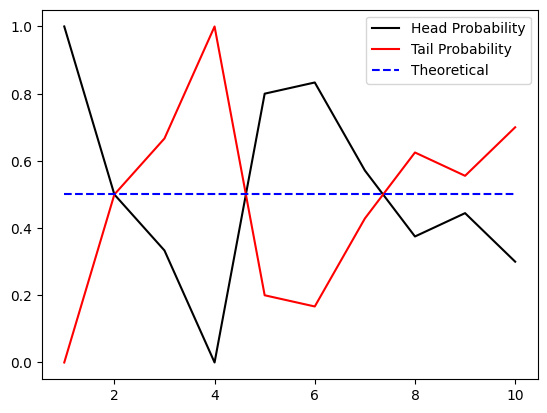

In [8]:
toss_exp(10, 1)

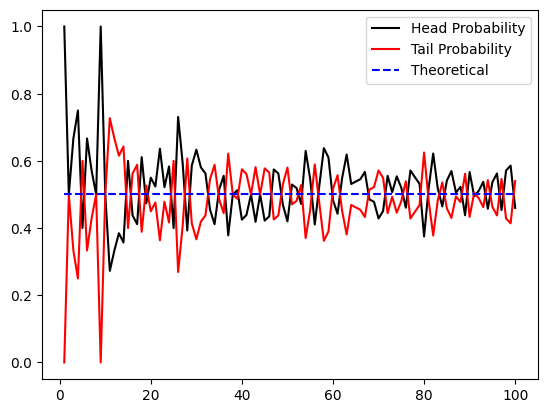

In [9]:
toss_exp(100, 1)

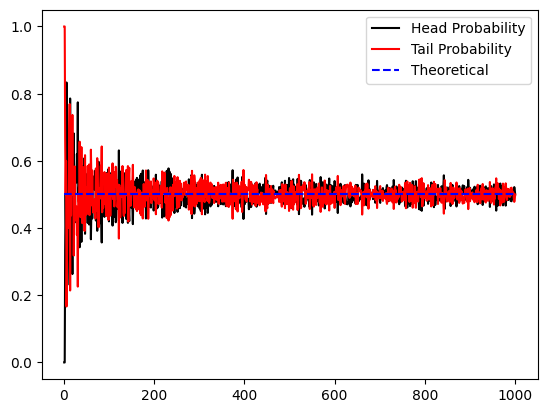

In [10]:
toss_exp(1000, 1)

In [11]:
single_coin_tosses = coin_sim(1000000,1)
single_coin_tosses

Dist({'H': 500431, 'T': 499569})

In [12]:
p_head = P({'H'}, single_coin_tosses)
p_tail = P({'T'}, single_coin_tosses)

print(f"Head Probability: {p_head} \n Tail Probability: {p_tail}")

Head Probability: 0.500431 
 Tail Probability: 0.499569


Dari hasil diatas, semakin besar pelemparannya, kita bisa melihat bahwa nilai peluang angka atau gambar semakin dekat dengan nilai peluang secara teori yaitu $0.5$.

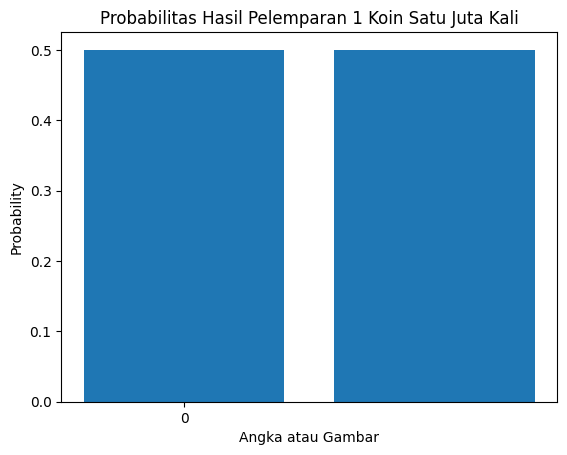

In [13]:
plt.bar([0,1],[P({'H'}, single_coin_tosses),P({'T'}, single_coin_tosses)])
plt.title("Probabilitas Hasil Pelemparan 1 Koin Satu Juta Kali")
plt.xticks(np.arange(0, 1))
plt.xlabel("Angka atau Gambar")
plt.ylabel("Probability")
plt.show()

* Selanjutnya coba simulasi melempar 4 koin sebanyak 1 juta kali

In [14]:
n_coin_tosses = coin_sim(1000000, 4)
n_coin_tosses

Dist({'HTTH': 62927,
      'TTTH': 62743,
      'THTH': 62715,
      'HHTT': 62678,
      'TTHT': 62663,
      'HHHH': 62632,
      'HTHT': 62556,
      'HHHT': 62551,
      'HTTT': 62538,
      'THTT': 62417,
      'HTHH': 62389,
      'TTHH': 62372,
      'THHH': 62301,
      'HHTH': 62256,
      'THHT': 62167,
      'TTTT': 62095})

* Kemudian, kita hitung probabilitas muncul 2 angka dari 4 koin tersebut dari proporsi kemunculannya
* Ingat kemunculan 2 angka pada 4 koin bisa dari **beberapa kombinasi** 

In [15]:
p_head = P({'HHTT'}, n_coin_tosses) +  P({'HTHT'}, n_coin_tosses) + P({'THTH'}, n_coin_tosses) + \
          P({'TTHH'}, n_coin_tosses) + P({'HTTH'}, n_coin_tosses) + P({'THHT'}, n_coin_tosses)

print(f"Head Probability: {p_head}")

Head Probability: 0.37541500000000005


- Ternyata jawabannya bukan 0.5
- Bagaimana jika yang kita lempar lebih dari 4 koin? Misalnya 100 koin 
- Mungkin bisa disimulasikan tapi perlu perubahan code untuk lebih efisien

In [16]:
# untuk menjalankan code ini butuh lebih dari 5 menit
# n_coin_tosses = coin_sim(1000000, 100)
# n_coin_tosses


- Apakah ada cara analitik untuk melakukan penyelesaian case ini?
- Dari materi video kemarin kita bisa manfaatkan peluang (pmf) dari suatu distribusi variable random
- Namun kita perlu tau termasuk variable random apa case yang kita hadapi?


Kumpulkan informasi yang kita ketahui:
- Terdapat 2 outcome dari kejadian pelemparan koin: angka dan gambar, Apakah pelemparan koin di kasus ini **Variable Random Bernouli**? 
  - Variable Random Bernouli memodelkan kejadian yang punya 2 outcome saja (Angka dan Gambar)
  - Akan benar berdistribusi Bernouli jika hanya 1 koin saja yang dilempar, di case ini tidak sampai disitu, ada beberapa informasi lain, seperti:
- Ada 4 koin yang dilempar : n banyak percobaan
- Probabilitas angka keluar dari sebuah lemparan koin: 0.5

Ketiga ciri ini menunjukkan ciri **Variable random Binomial**, dimana distribusi ini memodelkan situasi apapun dimana

- Kita punya n percobaan yang idependen
- Setiap percobaan dapat menghasilkan 2 kejadian yakni gagal dan sukses.
- Dan probabilitas suksesnya adalah p.


Dimana sukses =  muncul angka, gagal = muncul gambar
- maka banyak angka yang muncul dari 4 pelemparan kita bisa simpan dalam variable random X yang diasumsikan berdistribusi Binomial, $$X \sim \text{Bin}(4, 0.5)$$


- Kita bisa mencari peluang muncul nya 2 angka pada 4 koin yang dilempar adalah dengan mencari nilai PMF Variable Random X yang berdistribusi binomial dengan parameter n = 4 dan p = 0.5

### 2. Binomial Distribution

### Binomial PMF

$$
P(X=x)  = \binom{n}{x} p^x (1-p)^{n-x}
$$



Koefisien Binomial

$$
\binom{n}{k} = \frac{n!}{(n-k)!k!} \text{ for } k \leq n
$$


- Selesaikan menggunakan PMF Distribusi Binomial
- Hitung nilai PMF dari X saat x bernilai 2 
- Probabilitas 2 angka muncul dari 4 koin yang dilempar $P(X=2)$ adalah 

In [17]:
# peluang (PMF) dari bistribusi binomial saat banyak kemunculan angka x = 2 pada banyak koin n = 4 dengan peluang muncul angka p = 0.5

# binom.pmf adalah fungsi untuk menghitung PMF binomial, fungsi tersebut menerima parameter x, n dan p
binom.pmf(2, 4, 0.5)

np.float64(0.375)

- Hasil perhitungan menggunakan PMF Distribusi Binomial dan hasil perhitungan peluang menggunakan [Simulasi](#scrollTo=kjCauICcqo1S) 
- Kita bisa menggunakan PMF untuk menghitung peluang dari kemunculan angka pada lebih dari 4 koin tanpa harus menggunakan simulasi yang membutuhkan cost lebih besar, misalnya 100 koin

In [18]:
# peluang (PMF) dari bistribusi binomial saat banyak kemunculan angka x = 50 pada banyak koin n = 100 dengan peluang muncul angka p = 0.5
binom.pmf(50, 100, 0.5)

np.float64(0.07958923738717875)

- Visualisasi banyak kemunculan angka pada n koin yang dilempar

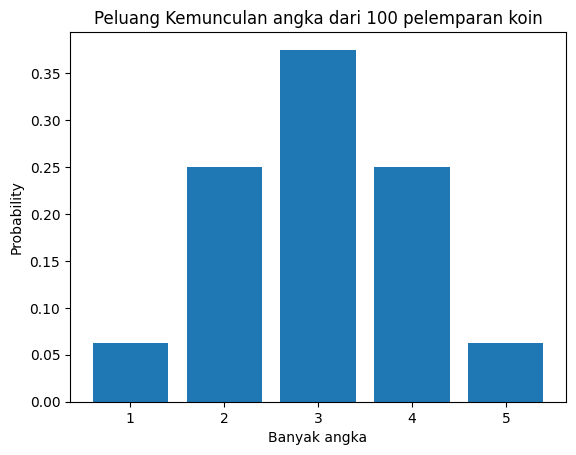

In [59]:
n_koin = 4 # coba ganti 5, 10 dan 100 
all_binomial_proba = np.zeros(n_koin + 1)
for i in range(n_koin + 1):
    all_binomial_proba[i] = binom.pmf(i, n_koin, 0.5)

plt.bar(np.arange(1, len(all_binomial_proba) + 1), all_binomial_proba)
plt.title("Peluang Kemunculan angka dari 100 pelemparan koin")
plt.xlabel("Banyak angka")
plt.ylabel("Probability")
plt.show()

### Kesimpulan 

- Peluang keluar 2 angka dari 4 koin adalah 0.375
- Nilai peluang tersebut dapat dicari dari perhitungan kemunculan dari simulasi maupun memakai rumus pmf yang memodelkan kejadian pelemparan pada distribusi binomial
- Walaupun sekilas kemunculan 2 angka pada 4 koin probabilitasnya 0.375 terkesan kecil, namun nilai tersebut paling tinggi dari pada peluang kejadian yang lain bisa kita lihat dari hasil visualisasi
- Lebih mungkin terjadi keluar angka dan gambar di frekuensi yang sama, daripada lebih besar frekuensi kemunculan salah satunya
___

### Exercise

1. Berapa peluang keluar 1 angka dari 4 koin yang dilempar?

In [18]:
# Mencari nilai pmf saat x = 1 dengan n = 4 dan p = 0.5 menggunakan rumus pmf binomial

p = binom.pmf(1, 4, 0.5)

print(f"peluang keluar 1 angka dari 4 koin yang dilempar adalah {p}")

peluang keluar 1 angka dari 4 koin yang dilempar adalah 0.25


2. Berapa peluang keluar 5 angka dari 10 koin yang dilempar?

In [19]:
# Mencari nilai pmf saat x = 5 dengan n = 10 dan p = 0.5 menggunakan rumus pmf binomial

p = binom.pmf(5, 10, 0.5)

print(f"peluang keluar 1 angka dari 4 koin yang dilempar adalah {p}")

peluang keluar 1 angka dari 4 koin yang dilempar adalah 0.24609375000000003


## **Study Case 2: Chuck-a-luck**
____



Mari bermain Chuck-a-luck! Chuck-a-luck adalah sebuah permainan dimana anda disuruh menebak salah satu angka dari {1,2,3,4,5,6} 
- Jika angka yang anda tebak muncul pada hasil pelemparan 3 dadu, anda akan mendapatkan i, i = 1,2,3 dolar sesuai dengan banyak angka tebakan yang keluar.
- Jika angka yang ditebak tidak muncul sama sekali, maka pemain kalah sebesar 1
dolar.
- Analisis apakah permainan ini adil

<img src="https://cdn.shopify.com/s/files/1/1279/9999/products/50-1010-5__51154.1395352777.1280.1280_8a6df156-4b73-4a7a-917a-6c4313db0223.jpeg?v=1571438918" width=300/>

Permainan adil ketika:
- Tidak merugikan 2 belah pihak, pemain maupun bandar
- Ketika melakukan banyak permainan, pemain atau bandar tidak rugi

Untuk menjawab pertanyaan tersebut, kita bisa menjawab dengan dua pendekatan, yaitu:

- Melakukan simulasi melemparkan dadu dan menebak secara berkali - kali lalu menghitung proporsi kemunculan tebakannya dan ketidak munculan tebakan
- Menggunakan konsep expected value random variables untuk melihat kumulasi uang yang didapatkan

### 1. Simulation
- Mari coba simulasikan permainannya dan hitung hasil akhir uang yang kita terima berdasarkan hasil keluaran dari simulasi
- Atur banyak percobaan permainan sebesar satu juta kali
- Simulasikan dari setiap percobaan pilih acak angka tebakan dan lihat hasil lemparan 3 dadunya

In [20]:
np.random.seed(1)

# Banyak percobaan permainan
n_trials = 1000000

# Pilihan acak 1 angka tebakan dari dadu {1,2,3,4,5,6}

# np.random.randomint adalah fungsi untuk mendapatkan angka random dengan beberapa setting parameter urutan angka acak, dan banyaknya angka acak 
choice = np.random.randint(1,7, size = (n_trials,1))
print(f"Tebakan : \n {choice}")

# Hasil acak pelemparan 3 dadu
rolls = np.random.randint(1,7, size = (n_trials, 3))
print(f"\n Hasil pelemparan 3 dadu : \n {rolls}")

Tebakan : 
 [[6]
 [4]
 [5]
 ...
 [3]
 [6]
 [6]]

 Hasil pelemparan 3 dadu : 
 [[3 6 6]
 [4 5 6]
 [6 5 1]
 ...
 [5 6 4]
 [6 1 5]
 [6 2 2]]


- Dari hasil tersebut bisa kita lihat di percobaan pertama yang ditebak angka 6 yang muncul 3,6,6 maka kita akan mendapatkan 2 dolar
- Selanjutnya ditebak angka 4 yang muncul 4,5,6 maka kita akan mendapatkan 1 dolar
- Hasil kumulatif yang kita dapatkan dari 2 percobaan permainan adalah 3 dolar
- Hitung kumulatif uang yang kita dapatkan di akhir permainan

In [21]:
# Pengecekan banyak tebakan angka yang muncul di pelemparan 3 dadu
count_bet = np.sum(choice==rolls, axis=1)
print(count_bet)

[2 1 1 ... 0 1 1]


In [22]:
# hitung kumulasi kemenangan dari kemunculan tebakan dan banyak kekalahan jika tebakan sama sekali tidak muncul

winning_dollar = 1
losing_dollar = -1
number_bet_appear = np.sum(count_bet)
number_bet_notappear = np.sum(count_bet==0)


earn = winning_dollar*number_bet_appear + losing_dollar*number_bet_notappear
print(earn)

-78754


- Ternyata di akhir dari  satu juta permainan kita akan rugi 78754 dolar
- Maka dapat disimpulkan permainan ini tidak adil, karena merugikan pemain

- Permainan juga bisa dikatakan adil jika ekspektasi uang yang didapatkan 0 (pemain tidak rugi uang dan bandar tidak rugi) 

- Ekspektasi hasil uang yang didapatkan bisa didapatkan dari perkalian peluang menang dengan uang yang didapatkan dijumlahkan dengan peluang kalah dengan uang yang harus diberikan

In [23]:
probability_winning = number_bet_appear/n_trials
probability_lose = number_bet_notappear/n_trials

mean_winnings = winning_dollar*probability_winning+losing_dollar*probability_lose
print(mean_winnings)

-0.07875399999999999


- Mari kita coba cari cara menghitung secara analitik.
- Cari tau variable random apa yang dapat digunakan untuk menyelesaikan case ini
- Kumpulkan informasi yang kita ketahui:
  - Ada 3 dadu yang dilempar : n banyak percobaan
  - Terdapat 2 outcome dari kejadian pelemparan sebuah dadu: angka yang ditebak **muncul** dan **tidak**
  - Probabilitas angka keluar dari sebuah lemparan dadu: 1/6



Ketiga ciri ini menunjukkan ciri **Variable Random Binomial**, dimana distribusi ini memodelkan situasi apapun dimana

- Kita punya n percobaan yang idependen
- Setiap percobaan dapat menghasilkan 2 kejadian yakni gagal dan sukses.
- Dan probabilitas suksesnya adalah p.

Dimana sukses =  muncul angka yang ditebak, gagal = tidak muncul angka yang ditebak
- maka jumlah uang dari angka tebakan yang muncul dari 3 pelemparan dadu, bisa disimpan dalam variable random X yang diasumsikan berdistribusi Binomial, $$X \sim Bin(3, 1/6)$$

- Ekspektasi pendapatan uang sama dengan mencari nilai $E[X]$ Variable Random X yang berdistribusi binomial dengan parameter n = 4 dan p = 0.5

### 2. Binomial: Expected Value
- Selesaikan dengan Perhitungan ekspektasi pada distribusi binomial
- X adalah jumlah uang yang pemain dapatkan dari 3 kali pelemparan dadu, maka $X \sim Bin(3, 1/6)$

In [24]:
p = 1/6
n = 3

# hitung rata rata pendapatan uang dari perkalian pendapatan uang dan peluangnya

p_lose_1_dollar = binom.pmf(0, n, p)
p_earn_1_dollar = binom.pmf(1, n, p)
p_earn_2_dollar = binom.pmf(2, n, p)
p_earn_3_dollar = binom.pmf(3, n, p)

expected_earning = (-1*p_lose_1_dollar) + (1*p_earn_1_dollar) + (2*p_earn_2_dollar) + (3*p_earn_3_dollar)
print(expected_earning)

-0.07870370370370351


### Kesimpulan

- Hasil ekspektasi pendapatan yang didapatkan dari simulasi dan rumus expected value tidak bernilai positif
- Maka setelah melakukan banyak percobaan pemain akan cenderung kalah memberikan uang ke bandar (minus)
- Permainan akan adil jika hasil ekspektasi kemenangannya adalah 0 
- Dapat disimpulakn bahwa permainan ini tidak adil

____

Visualisasi kemunculan tebakan dari 3 dadu

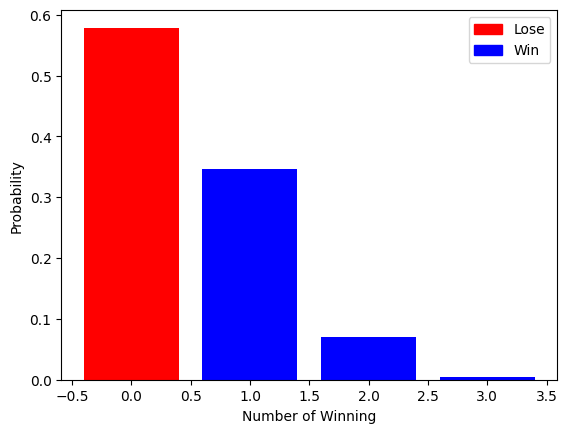

In [25]:
n_dadu = 3
all_binomial_proba = np.zeros(n_dadu + 1)
for i in range(n_dadu + 1):
    all_binomial_proba[i] = binom.pmf(i, n_dadu, 1/6)

plt.bar(np.arange(len(all_binomial_proba)), all_binomial_proba, color=['red', 'blue', 'blue', 'blue'])

plt.xlabel("Number of Winning")
plt.ylabel("Probability")
red_patch = mpatches.Patch(color='red', label='Lose')
blue_patch = mpatches.Patch(color='blue', label='Win')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

### 3. Explore

Jika anda bermain permainan tersebut, pada percobaan permainan keberapa anda akan mendapatkan uang pertama kali ?

- Cari peluang mendapatkan uang, bisa mendapatkan 1,2, atau 3 dolar

In [26]:
p_earn_dollar = p_earn_1_dollar + p_earn_2_dollar + p_earn_3_dollar
p_earn_dollar

np.float64(0.4212962962962964)

- Untuk mencari ekspektasi percobaan yang harus dilakukan untuk mendapatkan uang pertama kali, perlu kita tau distribusi apa percobaan untuk mendapatkan uang pertama kali? 
- Aplikasi Distribusi Geometrik dapat memodelkan hal tersebut
- Dimana, mendapatkan uang = sukses 

- Maka kita bisa mencari ekspektasi banyak percobaan sampai mendapatkan kesuksesan pertaman kali $$E[X]=\frac{1}{p}$$ dari distribusi Geometrik dimana X adalah banyak percobaan untuk mendapatkan tebakan angka yang muncul pertama kali, $$X \sim Geo(p\_earn\_dollar)$$

In [27]:
# hitung ekpektasi banyak percobaan untuk mendapatkan uang dengan probabilitas p_earn_dollar pertama kali
# gunakan expected value geometric distribution

expected_trial_until_earn_dollar = 1/p_earn_dollar 
print(expected_trial_until_earn_dollar)

2.373626373626373


### Kesimpulan

- Harus melakukan 3 kali percobaan dengan 2 kali kekalahan, menyerahkan 2 dolar sebelum mendapatkan uang di percobaan ke 3 
- Rugi kalau mendapatkan 1 dolar aja
- Mari cek yang mana yang lebih mungkin, mendapatkan 1 dolar atau 3 dolar

In [28]:
p_earn_1_dollar

np.float64(0.3472222222222223)

In [29]:
p_earn_3_dollar

np.float64(0.0046296296296296285)

- Dari peluangnya lebih mungkin dapat 1 dolar aja
-Jadi di walaupun kita akan mendapatkan kemenangan pertama kali di percobaan ke-3, kita akan lebih mungkin rugi -2\$+1\$ = -1\$ daripada seri atau untung

___

### Exercise

Berapa ekspektasi percobaan yang harus dilakukan hingga anda akan mendapatkan uang 3 dolar pertama kali ?

In [30]:
# Mencari nilai E[X] saat p = peluang mendapatkan 3 dolar menggunakan rumus E[X] Geometri

e = 1/p_earn_3_dollar

print(f"Ekspektasi percobaan yang harus dilakukan untuk mendapatkan 3 dolar pertama kali adalah {e}")

Ekspektasi percobaan yang harus dilakukan untuk mendapatkan 3 dolar pertama kali adalah 216.00000000000006


## **Study Case 3: Defect Screw**
____


Sebuah perusahaan memproduksi sekrup dan melakukan inspeksi kualitas sekrup. Perusahaan tersebut menyimpan [data inspeksi sekrup cacat](https://docs.google.com/spreadsheets/d/162AhsxCHd88gxGmGZa_lPDuhFkzfpIW-/edit?usp=sharing&ouid=100608989434241589255&rtpof=true&sd=true) dalam file excel yang kita baca di bawah ini


### Data

In [31]:
defect_test = pd.read_csv("../data/defect_test.csv") # fungsi untuk membaca data excel "defect_test.xlsx"
defect_test.head()

,Unnamed: 0,id_sekrup,lolos_uji_cacat
0,0,1,1
1,1,2,1
2,2,3,1
3,3,4,1
4,4,5,1


- Di dua kasus sebelumnya kita mencari peluang menggunakan simulasi
- Jika kita mempunyai data, kita bisa menghitung peluang dari data tersebut, tidak perlu melakukan simulasi untuk menghitung peluang


- Coba kita hitung peluang sekrup cacat dari data inspeksi perusahaan tersebut

In [32]:
defect_condition = defect_test[defect_test["lolos_uji_cacat"]==0] # data defect_test dengan kolom lolos_uji_cacat bernilai 0
count_defect = len(defect_condition) # banyak data dengan kolom lolos_uji_cacat bernilai 0 
count_rowdata = len(defect_test) # banyak data keseluruhan

p_defect = count_defect/count_rowdata
p_defect

0.01

### Question
Dari data tersebut kita dapatkan peluang cacat sebesar 0.01. Perusahaan tersebut menjual sekrup-sekrup dalam bentuk kemasan berisi 10 buah sekrup dan menawarkan jaminan uang kembali jika terdapat lebih dari 1 sekrup yang cacat. Selesaikan beberapa pertanyaan berikut: 

1. Berapa proporsi banyak kemasan terjual yang harus diganti oleh perusahaan?
2. Berapa ekspektasi banyak sekrup yang rusak dalam kemasan
3. Berapa ekspektasi banyak sekrup yang harus dicek untuk mendapatkan sekrup yang cacat pertama kali
4. Berapa ekspektasi banyak kemasan yang harus dicek untuk mendapatkan kemasan yang harus diganti pabrik pertama kali (mendapatkan lebih dari satu sekrup yang cacat)

___



Untuk menjawab pertanyaan diatas, apakah bisa kita selesaikan dengan menggunakan data yang kita punya? 

Mari coba selesaikan nomer 1. karena kemasan terjual itu memiliki kondisi sekrup cacat lebih dari satu, yang bisa kita hitung dari datanya adalah peluang sekrup cacat lebih dari satu

In [33]:
p_more_than_one_defect = len(defect_test[defect_test["lolos_uji_cacat"]>=1])/len(defect_test)
p_more_than_one_defect

0.99

Namun yang diminta oleh soal adalah kondisi lebih dari 1 sekrup cacat di dalam kemasan, maka jawaban diatas tidaklah benar

- Untuk menjawab pertanyaan diatas, sepertinya kita bisa menggunakan bantuan peluang dari Variable Random. 
- Tapi Variable Random apa yang bisa kita gunakan untuk menyelesaikan pertanyaan tersebut?

Apa yang kita ketahui:

- Kejadian 2 outcome : cacat dan tidak
- Ada 10 sekrup : n percobaan
- Probabilitas sukses (cacat) p = 0.01 

Tiga poin diatas sangat mirip dengan syarat aplikasi Variable Random Binomial, maka kita bisa membuat X adalah banyak sekrup yang cacat di dalam kemasan dan $$X \sim Bin(10, 0.01)$$


### Binomial PMF

___
#### **Pertanyaan 1**: Hitung proporsi banyak kemasan terjual yang harus diganti oleh pabrik. 

- Kita bisa gunakan peluang dari Variable Random Binomial
- Hitung peluang banyak sekrup cacat lebih dari 1, $P(X>1)$

- Dengan Axiom Probability $P(X>1)$ bisa dicari dengan
$$P(X>1) = 1 - P(X=0) - P(X=1)$$ 

In [34]:
# menghitung P(X>1)

# P(X>1) = 1 - P(X=0) - (PX=1)

n = 10
p_defect = 0.01
p_return_defect = 1 - binom.pmf(0, n, p_defect) - binom.pmf(1, n, p_defect)
p_return_defect

# Second solution
# 1 - binom.cdf(1, n, p)

np.float64(0.004266200242831919)

#### **Jawaban Pertanyaan 1**

Jika kita punya 1000 kemasan maka akan ada 4-5 kemasan yang harus diganti

Visualisasi Distribusi sekrup Rusak dari 1 kemasan dan peluangnya

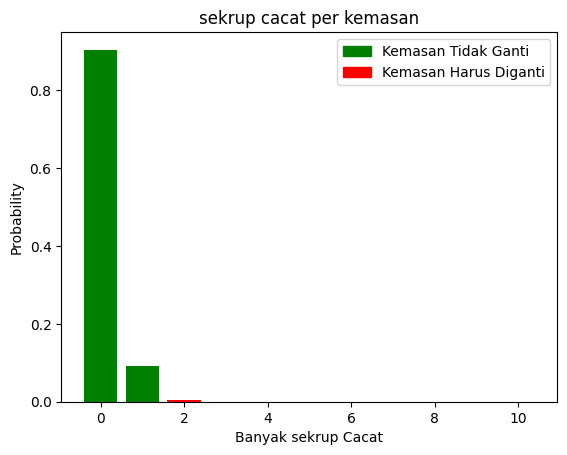

In [35]:
N = 10
all_binomial_proba = np.zeros(N + 1)
for i in range(N + 1):
    all_binomial_proba[i] = binom.pmf(i, N, 0.01)

plt.bar(np.arange(len(all_binomial_proba)), all_binomial_proba, color = ["green","green","red"])
red_patch = mpatches.Patch(color='green', label='Kemasan Tidak Ganti')
blue_patch = mpatches.Patch(color='red', label='Kemasan Harus Diganti')
plt.legend(handles=[red_patch, blue_patch])
plt.title("sekrup cacat per kemasan")
plt.xlabel("Banyak sekrup Cacat")
plt.ylabel("Probability")
plt.show()

- paling mungkin mendapatkan sekrup yang tidak cacat

___
#### **Pertanyaan 2. Berapa ekspektasi banyak sekrup yang rusak dalam kemasan**

- Kita bisa menggunakan perhitungan Expected Value

$$E[X] = n\times p$$

In [36]:
# Ekspektasi banyak sekrup rusak E[X]
# E[X] = n x p_defect

expected_screw_defect = n * p_defect
print(10*0.01)

0.1


#### **Jawaban Pertanyaan 2**
- Ekspektasi sekrup yang rusak adalah 0.1 dalam kemasan
- Kecil sekali bahkan tidak sampai 1 sekrup yang rusak

____
#### **Pertanyaan 3. Berapa ekspektasi banyak sekrup yang harus dicek untuk mendapatkan sekrup yang cacat pertama kali**



- Berbeda dengan soal sebelumnya, konteks soal nomer 3 adalah berapa pengecekan sekrup yang dicari
- Yang kita ketahui
  - Kejadian 2 outcome : cacat dan tidak
  - Probabilitas sukses (cacat) p = 0.01
- Kita bisa menggunakan Variable Random Geometri yang memodelkan percobaan yang harus dilakukan sampai sukses pertama kali

##### Geometric Expected Value
- X adalah **banyak pengecekan sekrup** yang harus dilakukan sampai ketemu sekrup yang cacat pertama kalinya, maka $$X \sim Geo(p = 0.01)$$
- Soal nomer 3 mencari ekspektasi banyak pengecekan sampai ketemu sekrup yang cacat, maka kita bisa mencari $E[X]$ dari Variable Random Geometrik
$$E[X] = \frac{1}{p}$$



In [37]:
# Ekspektasi banyak sekrup yang dicek sampai bertemu sekrup yang cacat
expected_sc_untillfirst_defect = 1/p_defect
expected_sc_untillfirst_defect

100.0

#### **Jawaban Pertanyaan 3**

- Ternyata, butuh 100 sekrup yang harus dicek untuk mendapatkan sekrup cacat pertama kali

___
#### **Pertanyaan 4. Berapa ekspektasi banyak kemasan yang harus dicek untuk mendapatkan kemasan yang harus diganti pabrik pertama kali** (mendapatkan lebih dari satu sekrup yang cacat)



- Berbeda dengan soal sebelumnya, konteks soal nomer 4 adalah berapa **pengecekan kemasan** yang dicari
- Yang kita ketahui
  - Kejadian 2 outcome : kemasan diganti dan tidak diganti
  - Probabilitas sukses (kemasan diganti) p = p_return_defect
- Kita bisa menggunakan Variable Random Geometri yang memodelkan percobaan yang harus dilakukan sampai sukses pertama kali
- Namun yang dimodelkan adalah banyak pengecekan kemasan bukan pengecekan sekrup (berbeda dengan konteks nomer 3)




- X adalah **banyak pengecekan kemasan** yang harus dilakukan **sampai** ketemu kemasan yang harus diganti pertama kalinya, maka X ~ Geo(p = p_return_defect)
- Gunakan $E[X]$ Variable Geometri untuk mencari ekspektasi banyak pengecekan kemasan yang harus dilakukan

$$E[X] = \frac{1}{p}$$



In [38]:
expected_sachet_untillfirst_return = 1/p_return_defect
expected_sachet_untillfirst_return

np.float64(234.4006242276608)

#### **Jawaban Pertanyaan 4**
- Perlu 234-235 pengecekan kemasan sampai mendapatkan lebih dari 1 sekrup yang cacat / kemasan harus diganti
  - Jika dilihat dari nomer 3, kita perlu 100 sekrup (10 kemasan) yang dicek untuk mendapatkan sekrup yang cacat pertama kali
  - Namun di pengecekan kemasan ke-10 bisa jadi 1 sekrup aja yang cacat jadi tidak perlu mengganti kemasan
- Perlu 234-235 kemasan yang dicek untuk mendapatkan lebih dari 1 sekrup yang cacat, hal ini selaras dengan nomer 2, dari 1000 kemasan hanya ada 4-5 kemasan yang perlu diganti
- Sekitar setiap 250 kemasan yang dicek ada 1 kemasan yang perlu diganti


___
### Explore
- Kira kira berapa ekspektasi rentang pengecekan yang harus dilakukan?
- Kita bisa menggunakan standar deviasi sebagai representasi sebaran dari jumlah pengecekan
- Gunakan variance dari Variable Random Geometrik 
$$Var[X]=\frac{1-p}{p^2}$$

In [39]:
variance_sachet_untillfirst_return = (1-p_return_defect)/p_return_defect**2

# pakai standar deviasi agar unitnya sama
std_sachet_untillfirst_return = variance_sachet_untillfirst_return**(1/2)
std_sachet_untillfirst_return

np.float64(233.90008981205926)

Ekspektasi rentang pengecekan nya adalah 233 percobaan dari rata rata untuk mendapatkan kemasan yang perlu diganti lagi

___
### **Exercise**
Hitung ekspektasi banyak kemasan yang harus diganti oleh 
pabrik jika pabrik memproduksi 1500 kemasan.

In [40]:
# Ekspektasi banyak kemasan rusak yang harus diganti jika perusahaan harus meproduksi 1500 kemasan
# E[X] = n x p
expected_return_defect = p_return_defect*1500
expected_return_defect 

print(f"Ekspektasi banyak kemasan rusak yang harus diganti jika perusahaan harus meproduksi 1000 kemasan {expected_return_defect}")

Ekspektasi banyak kemasan rusak yang harus diganti jika perusahaan harus meproduksi 1000 kemasan 6.399300364247878


## **Study Case 4: Uniform Distribution**

____

Mari coba kita simulasikan 1 koin dan 1 dadu yang dilempar beberapa kali

### 1 Coin Tossing

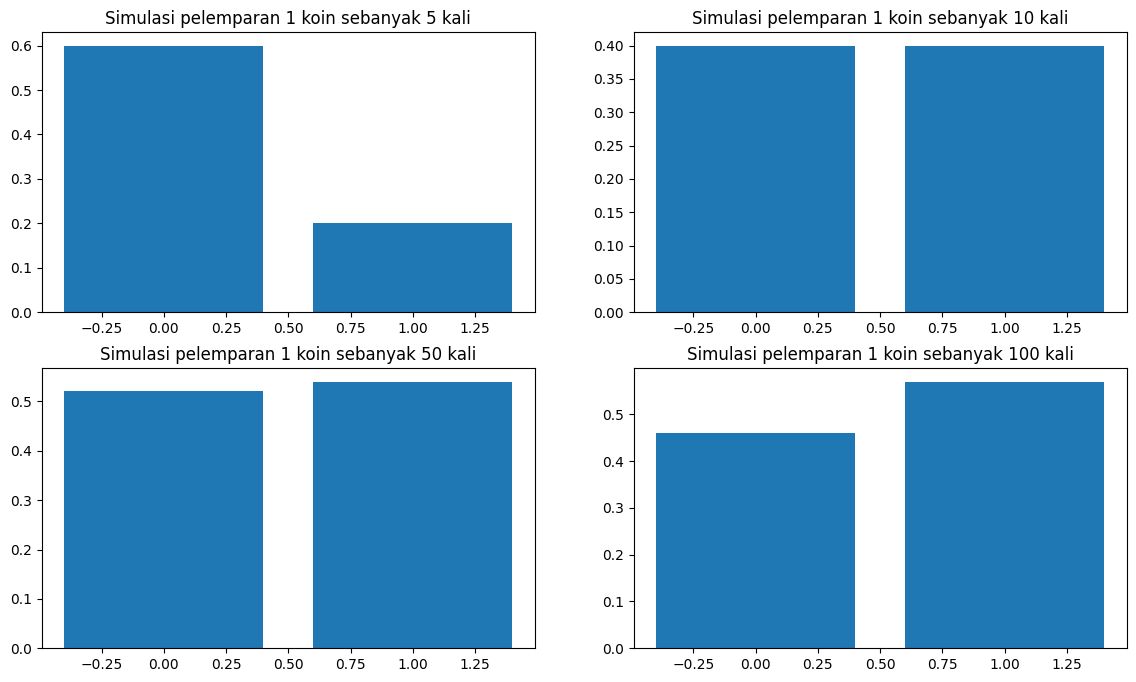

In [41]:
# Plot Probabilitas kemunculan angka dan gambar pada satu koin pada beberapa kali pelemparan n
n_coin = 1
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,8), sharex=False, sharey=False)
axes[0,0].bar([0,1],[P({'H'}, coin_sim(5,n_coin)),P({'T'}, coin_sim(5,n_coin))]); axes[0,0].set(title="Simulasi pelemparan 1 koin sebanyak 5 kali")
axes[0,1].bar([0,1],[P({'H'}, coin_sim(10,n_coin)),P({'T'}, coin_sim(10,n_coin))]); axes[0,1].set(title="Simulasi pelemparan 1 koin sebanyak 10 kali")
axes[1,0].bar([0,1],[P({'H'}, coin_sim(50,n_coin)),P({'T'}, coin_sim(50,n_coin))]); axes[1,0].set(title="Simulasi pelemparan 1 koin sebanyak 50 kali")
axes[1,1].bar([0,1],[P({'H'}, coin_sim(100,n_coin)),P({'T'}, coin_sim(100,n_coin))]); axes[1,1].set(title="Simulasi pelemparan 1 koin sebanyak 100 kali")
plt.show()

Pada pelemparan ke 100 kali peluang dari masing masing angka dan gambar adalah sama. Kejadian pelemaparan 1 koin dapat di modelkan menggunakan distribusi Uniform, karena peluang analitisnya adalah sama 

### 1 Dice Tossing

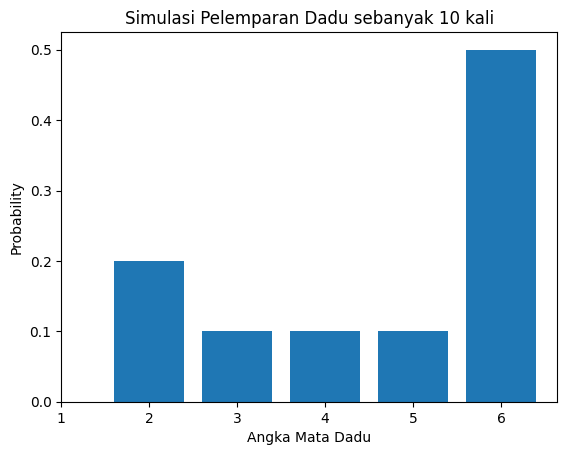

In [42]:
probability_model_dadu(jumlah_pelemparan=10)

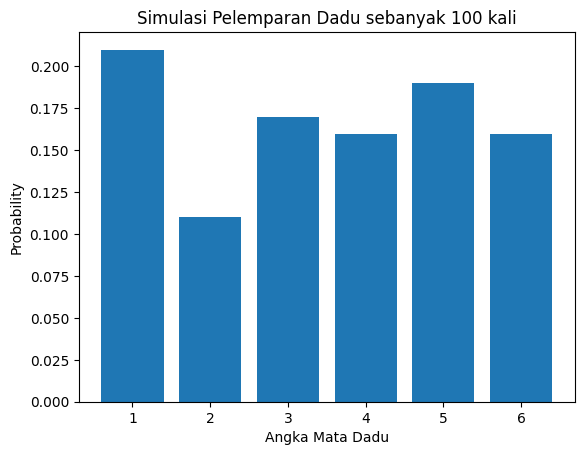

In [43]:
probability_model_dadu(jumlah_pelemparan=100)

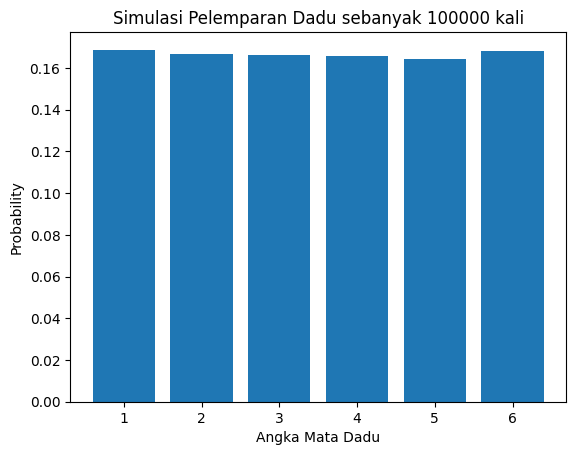

In [44]:
probability_model_dadu(jumlah_pelemparan=100000)

Pada pelemparan ke 100 kali peluang dari masing masing keluarnya angka pada adalah sama yaitu 1/6. Kejadian pelemaparan 1 dadu dapat di 
modelkan menggunakan distribusi Uniform, karena peluang analitis kejadiannya adalah sama 

### Case Uniform Distribution dari Data?

Aplikasi Distribusi Uniform hanya berlaku jika asumsi peluang semua kejadian sama, seperti pelemaparan koin dan dadu yang tidak cacat seperti 2 contoh diatas. Contoh lainnya:

1. Peluang penumpang kapal titanic survived atau tidak adalah 
sama = 0.5
2. Peluang terjualnya menu dalam sebuah restoran adalah sama
3. Peluang sekrup rusak dan tidak adalah sama 0.5
4. Peluang lampu menyala merah, kuning, hijau dalam perempatan lalu lintas adalah sama = 1/3

namun untuk poin 1 - 3 sepertinya sangat sulit ditemui dalam kehidupan nyata, karena probabilitas 1 kejadian pasti lebih mungkin dari salah satu kejadian yang lain. (lebih mungkin tidak selamat daripada selamat dalam kapal titanic)

- Distribusi Uniform hanya bekerja pada experiment yang didalamnya peluang kejadiannya sama, 
- Saat tidak ada alasan untuk mengungkapkan kejadian tersebut ada yang paling mungkin terjadi, bisa karena kecacatan alat, bias, dan keberpihakan kejadian 

# Reference

https://github.com/sinclam2/fifty-challenging-problems-in-probability